# Image segmentation

Since the primary aim of the `Band_Data` and `Data` classes we have recently been looking at is to produce a [Catalogue](../catalogue.rst) of sources, we will also need to be able to identify one object from another. This is done in a process known as segmentation, and in principle is quite challenging to do well, although we will have a go here.

# Example 1: Making segmentation maps with SExtractor

The first technique we will use to segment the data into different sources, which is the default in galfind, is to use the SExtractor parameters from Adams et al. 2023. Before starting this example please ensure that this is installed appropriately on your computer; an explanation of how to install SExtractor can be found [here](../getting_started/installation.rst). Let's start by instantiating our JOF data object as before.

In [1]:
from copy import deepcopy
import matplotlib.pyplot as plt
import astropy.units as u
from galfind import config, Data
from galfind.Data import morgan_version_to_dir

survey = "JOF"
version = "v11"
instrument_names = ["NIRCam"]

JOF_data = Data.from_survey_version(
    survey = survey,
    version = version,
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
)

__init__ imports took 0.6121602058410645s
Reading GALFIND config file from: /nvme/scratch/work/austind/GALFIND/galfind/../configs/galfind_config.ini


To look at what exactly the segmentation process is doing, we will try it on the F444W band only. To do this, we will first have to load in the aperture diameters.

In [2]:
aper_diams = [0.32, 0.5, 1.0, 1.5, 2.0] * u.arcsec
JOF_data.load_aper_diams(aper_diams)

F444W_JOF = JOF_data["F444W"]

INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F090W
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F115W
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F150W
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F162M
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F182M
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F200W
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F210M
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F250M
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F277W
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F300M
INFO:galfind:Loaded aper_diams=<Quantity [0.32, 0.5 , 1.  , 1.5 , 2.  ] arcsec> for F335M
INFO:galfi

We will now segment the F444W JOF imaging. This will take a little while as SExtractor is running; the output will be stored in the config `SExtractor/SEX_DIR` directory when it has finished under the appropriate survey/version/instrument sub-directories (which in this case this is JOF/v11/NIRCam).

In [3]:
F444W_JOF_2 = deepcopy(F444W_JOF)
F444W_JOF_3 = deepcopy(F444W_JOF)
F444W_JOF_4 = deepcopy(F444W_JOF)
F444W_JOF_5 = deepcopy(F444W_JOF)

F444W_JOF.segment()
print(F444W_JOF)

Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND


In addition to the segmentation map, this function will additionally produce a background map and photometric catalogue with fluxes (from sources selected in the same band) in apertures set by the `SExtractor/APER_DIAMS` parameter in the config file. The `seg_path` and the method used to measure this will be saved inside the `Band_Data` class for future access. 

Now let's say we wanted to load the path to the segmentation map rather than making it. We can simply run this function again on a fresh `Band_Data` object, and if the required file already exists it will load the path to it.

In [4]:
F444W_JOF_2.segment()

Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND


We see from above that SExtractor is not called here. If we wanted to re-run this segmentation map for whatever reason, there are two possible actions we could take:

1. Delete or move the saved segmentation map manually
2. Pass `overwrite=True` into the `segment` function on a pre-segmented object

Option 2 is the preferred, and probably more straight forward, choice to make here. Below is its implementation.

In [5]:
# re-segment using SExtractor
F444W_JOF_3.segment(overwrite=True)

INFO:galfind:Making SExtractor seg/bkg maps for JOF v11 F444W


Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
1

2

NIRCam
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
<Quantity10.67arcsec>,<Quantity16.67arcsec>,<Quantity33.33arcsec>,<Quantity50.arcsec>,<Quantity66.67arcsec>


> 
----- SExtractor 2.25.0 started on 2024-09-30 at 17:49:01 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Measuring from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [1/9]
      "Unnamed" / no ext. header / 10244x4464 / 64 bits (floats)
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Weighting from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [2/9]
      "Unnamed" / no ext. header / 10244x4464 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map 

Changed directory back to /nvme/scratch/work/austind/GALFIND


      Objects: detected 13440    / sextracted 9648            

> Closing files
> 
> All done (in 20.7 s: 215.3 lines/s , 465.3 detections/s)


Excellent! We have overwritten the original segmentation map, albeit with the exact same SExtractor output. Next we will produce a segmentation map using the stored `wht` map rather than the `rms_err` map by changing the `err_type` attribute from the default `rms_err` to `wht`. 

In [6]:
F444W_JOF_4.segment("wht", overwrite=True)
print(F444W_JOF_4)

INFO:galfind:Making SExtractor seg/bkg maps for JOF v11 F444W
> 
----- SExtractor 2.25.0 started on 2024-09-30 at 17:49:22 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)


Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
1

4

NIRCam
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
<Quantity10.67arcsec>,<Quantity16.67arcsec>,<Quantity33.33arcsec>,<Quantity50.arcsec>,<Quantity66.67arcsec>


> Initializing catalog
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Measuring from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [1/9]
      "Unnamed" / no ext. header / 10244x4464 / 64 bits (floats)
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Weighting from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [4/9]
      "Unnamed" / no ext. header / 10244x4464 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map at line:  448
> Setting up background map at line:  512
> Setting up background map at line:  576
> Setting up background map at line:  640
> Setting up background map at line:  704
> Setting up background map at line:  768
>

Changed directory back to /nvme/scratch/work/austind/GALFIND


      Objects: detected 14476    / sextracted 9972            

> Closing files
> 
> All done (in 22.6 s: 197.3 lines/s , 440.7 detections/s)


This will update the segmentation map path in the `Band_Data` object for F444W and make a new segmentation map using the `wht` path, although will not actually overwrite the previously run `rms_err` map. The difference between the two maps can be seen by comparing the segmentation maps generated from the two separate weight maps.

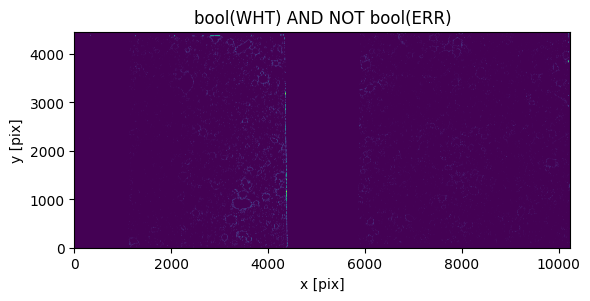

In [7]:
# load the segmentation maps
rms_err_seg = F444W_JOF.load_seg(incl_hdr = False)
wht_seg = F444W_JOF_4.load_seg(incl_hdr = False)
# plot the difference
fig, ax = plt.subplots()
ax.imshow(wht_seg.astype(bool) & ~rms_err_seg.astype(bool), origin = "lower")
ax.set_title("bool(WHT) AND NOT bool(ERR)")
ax.set_xlabel("x [pix]")
ax.set_ylabel("y [pix]")
plt.show()

Here we can see there is a minor difference between SExtractor segmentation using the ERR and WHT maps in that the WHT maps segments more of the outskirts surrounding bright objects in the wisp affected modules.

Lastly, we will regularly want to produce segmentation maps for every band used in a particular survey, for instance when running a cataloguing pipeline. As before, this takes in `err_type`, `method`, and `overwrite` arguments; we will implement the default functionality of this below.

In [8]:
JOF_data.segment(err_type="rms_err", method="sextractor", overwrite=False)
print(JOF_data)

Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND
Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND
Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND
Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.sex /nvme/scratch/wo

## Example 2: Plotting the segmentation maps

Once the segmentation map has been created, the next step is to plot it. We use the `Data.plot()` function using the `ext = "SEG"` argument. There are a few more arguments that we write explicitly for clarity, although we note that for now we will keep these as the galfind defaults.

In [9]:
#JOF_data["F444W"].plot(ext = "SEG")

Maybe we also want to zoom into a specific region of the segmentation map as well to have a closer look at some specific sources. Let's change some of the default arguments now to see how this changes the output plot.

## Example 3: Re-configuring SExtractor

We have shown how running SExtractor can work using the default configuration, but what if we want to change this? This is rather straightforwards, as we can simply use the `config_path` argument of the `Band_Data/Stacked_Band_Data/Data` segment function. Let's have a go at this now, again for the F444W filter, also showing explicitly how the default output parameters can be changed with `params_name`. The default `params_name` is still used here, although more information regarding which output parameters are saved can be found in [the official SExtractor documentation](https://sextractor.readthedocs.io/_/downloads/en/stable/pdf/).

In [10]:
F444W_JOF_5.segment("rms_err", config_name="test1.sex", params_name="default.param")

Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/test1.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
Changed directory back to /nvme/scratch/work/austind/GALFIND


Hmm, looks like the already run default segmentation maps are loaded in here instead of the ones we wanted to use with the updated config file. Of course we could have set `overwrite=True` in the above code block, but should we wish to compare the two SExtractor outputs we will need to keep the original data too. To get around this, we will use a new version name called `v11_test`. This will load in the `v11` data but save all of the products in `v11_test` folders. Due to this functionality, we caution the reader to not include underscores in their version names. 

In [15]:
JOF_data_test = Data.from_survey_version(
    survey = survey,
    version = f"{version}_test",
    instrument_names = instrument_names, 
    version_to_dir_dict = morgan_version_to_dir,
    aper_diams = aper_diams,
)
F444W_JOF_test = JOF_data_test["F444W"]
F444W_JOF_test.segment("rms_err", config_name="test.sex", params_name="default.param", overwrite=True)

INFO:galfind:Making SExtractor seg/bkg maps for JOF v11_test F444W


Changed directory to /nvme/scratch/work/austind/GALFIND/galfind
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/test.sex /nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
1

2

NIRCam
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/test.sex
/nvme/scratch/work/austind/GALFIND/galfind/../configs/SExtractor/default.param
<Quantity10.67arcsec>,<Quantity16.67arcsec>,<Quantity33.33arcsec>,<Quantity50.arcsec>,<Quantity66.67arcsec>


> 
----- SExtractor 2.25.0 started on 2024-09-30 at 18:04:09 with 1 thread

> Setting catalog parameters
> Reading detection filter
> Initializing Neural Network
> Reading Neural Network Weights
> Initializing check-image(s)
> Initializing catalog
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Measuring from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [1/9]
      "Unnamed" / no ext. header / 10244x4464 / 64 bits (floats)
> Looking for jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits
----- Weighting from: jw04210-o001_t002_nircam_clear-f444w_i2dnobg.fits [2/9]
      "Unnamed" / no ext. header / 10244x4464 / 32 bits (floats)
Detection+Measurement image: > Setting up background maps
> Setting up background map at line:   64
> Setting up background map at line:  128
> Setting up background map at line:  192
> Setting up background map at line:  256
> Setting up background map at line:  320
> Setting up background map at line:  384
> Setting up background map 

Changed directory back to /nvme/scratch/work/austind/GALFIND/galfind


      Objects: detected 8387     / sextracted 7155            

> Closing files
> 
> All done (in 18.0 s: 247.6 lines/s , 396.9 detections/s)


That's all well and good, but what is the difference between these outputs? The difference between `default.sex` and `test.sex` is that the parameters DETECT_MINAREA, DETECT_THRESH, and ANALYSIS_THRESH have been changed. We should plot the difference to see how this impacts things. 

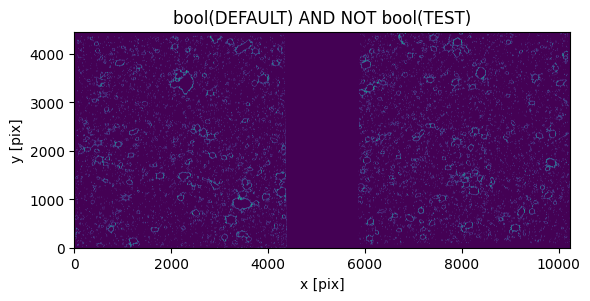

In [16]:
# load the segmentation maps
default_seg = F444W_JOF.load_seg(incl_hdr = False)
test_seg = F444W_JOF_test.load_seg(incl_hdr = False)
# plot the difference
fig, ax = plt.subplots()
ax.imshow(default_seg.astype(bool) & ~test_seg.astype(bool), origin = "lower")
ax.set_title("bool(DEFAULT) AND NOT bool(TEST)")
ax.set_xlabel("x [pix]")
ax.set_ylabel("y [pix]")
plt.show()

It should be easy to now test different SExtractor configurations iteratively until you find the parameters ideal for your specific science goals.